In [1]:
!pip install nltk

In [2]:
!pip install inflect

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk import word_tokenize # tokenize documents into words.

In [4]:
# for lemmatization of the text
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\taofe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# for word tokenization
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\taofe\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [6]:
data = pd.read_csv('amazon-baby/amazon.csv')
data.head()

,reviewerID,asin,reviewerName,helpful,helpful_num,helpful_den,reviewText,overall,summary,unixReviewTime,reviewTime,exclamationcount,questioncount,charcount,wordcount,capcount,avgrating,diffrating,ishelpful
0,A3NMPMELAZC8ZY,097293751X,Jakell,"[3, 3]",3,3,This book is perfect! I'm a first time new mo...,5,Great for newborns,1359244800,"01 27, 2013",1,0,250,46,0,4.0,1.0,1
1,A3O4ATU0ENBKTU,097293751X,MAPN,"[1, 1]",1,1,I use this so that our babysitter (grandma) ca...,5,Compact and Easy way to record the milestones,1361836800,"02 26, 2013",0,0,734,148,0,4.0,1.0,1
2,A2SYNL4YX73KNY,097293751X,"R. Davidson ""Jrdpa""","[2, 2]",2,2,"I like this log, but think it would work bette...",3,Needs clearer AM & PM,1369008000,"05 20, 2013",0,0,288,59,2,4.0,1.0,1
3,A2Q2A6JKY95RTP,097293751X,R. Garrelts,"[2, 2]",2,2,My wife and I have a six month old baby boy an...,3,Expensive and Somewhat Limited Format,1381968000,"10 17, 2013",0,0,2959,505,9,4.0,1.0,1
4,A21I33AWNOWMK8,9729375011,EmilyS,"[1, 2]",1,2,I have used this book since my son was born. ...,5,Great product!,1364256000,"03 26, 2013",0,0,595,117,0,4.5,0.5,0


In [7]:
data.shape

(56950, 19)

In [9]:
# extraxt the review feature
data = data[['reviewText']]
data.head()

,reviewText
0,This book is perfect! I'm a first time new mo...
1,I use this so that our babysitter (grandma) ca...
2,"I like this log, but think it would work bette..."
3,My wife and I have a six month old baby boy an...
4,I have used this book since my son was born. ...


In [10]:
# work with just 6 records
data = data[:6]

In [11]:
data.shape

(6, 1)

In [14]:
# convert the data to list of documents to be able to be indexable
documents = list(data['reviewText'])

In [13]:
print(documents[0])

This book is perfect!  I'm a first time new mom, and this book made it so easy to keep track of feedings, diaper changes, sleep.  Definitely would recommend this for new moms.  Plus it's small enough that I throw in the diaper back for doctor visits.


In [15]:
# tokenize the word
documents_word_token = []

for document in documents:
    tokenize_word = word_tokenize(document)
    
    documents_word_token.append(tokenize_word)

In [16]:
# check the tokenize documents at index 0
print(documents_word_token[0])

['This', 'book', 'is', 'perfect', '!', 'I', "'m", 'a', 'first', 'time', 'new', 'mom', ',', 'and', 'this', 'book', 'made', 'it', 'so', 'easy', 'to', 'keep', 'track', 'of', 'feedings', ',', 'diaper', 'changes', ',', 'sleep', '.', 'Definitely', 'would', 'recommend', 'this', 'for', 'new', 'moms', '.', 'Plus', 'it', "'s", 'small', 'enough', 'that', 'I', 'throw', 'in', 'the', 'diaper', 'back', 'for', 'doctor', 'visits', '.']


In [17]:
# check the tokenize documents at index 2
print(documents_word_token[2])

['I', 'like', 'this', 'log', ',', 'but', 'think', 'it', 'would', 'work', 'better', 'with', 'clearer', 'AM', '&', 'PM', 'sections', '.', 'Each', 'page', 'is', '12', 'hours', 'so', 'you', 'really', 'need', 'two', 'pages', 'a', 'day', 'if', 'your', 'baby', 'feeds', 'or', 'wets', 'a', 'lot', 'in', 'the', 'early', 'morning', 'hours', 'between', 'midnight', 'and', '7am', '.', 'We', "'re", 'cramming', 'those', 'in', 'to', 'the', '2', 'blank', 'spaces', 'above', '7am', 'right', 'now', '.']


In [18]:
# view the frequency distribution of words within the text
from nltk.probability import FreqDist

fdist = FreqDist(documents_word_token[0])

In [19]:
# check the most common words
fdist.most_common(15)

[(',', 3),
 ('.', 3),
 ('book', 2),
 ('I', 2),
 ('new', 2),
 ('this', 2),
 ('it', 2),
 ('diaper', 2),
 ('for', 2),
 ('This', 1),
 ('is', 1),
 ('perfect', 1),
 ('!', 1),
 ("'m", 1),
 ('a', 1)]

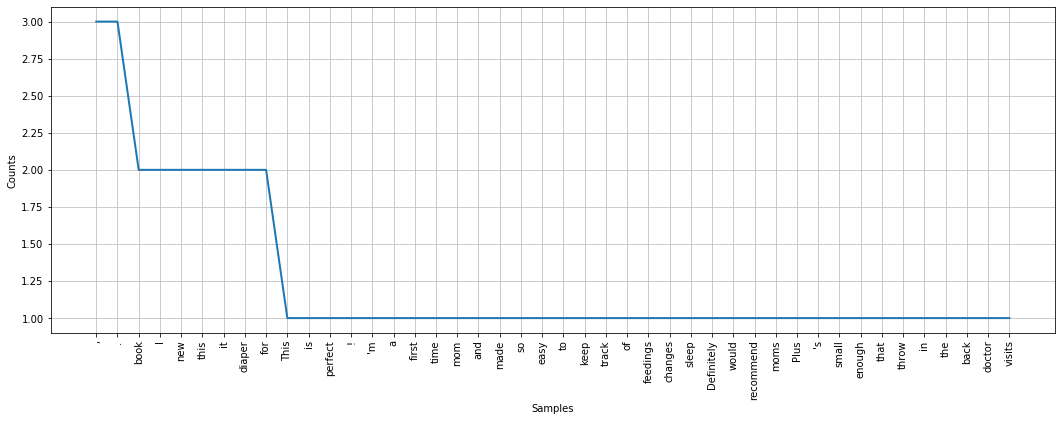

In [22]:
# frequency distribution visualizer
plt.figure(figsize=(18,6))

fdist.plot(cumulative=False)

plt.show()

In [23]:
# normalization operations for preprocesing of text data
import re, string, unicodedata
import nltk
import inflect

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [24]:
def to_lowercase(documents):
    
    documents_list = []
    
    for document in documents:
        new_word = document.lower()
        documents_list.append(new_word)
    
    return documents_list

In [26]:
def remove_punctuation(documents):
    
    documents_list = []
    
    for document in documents:
        
        new_word = re.sub('[^\w\s]', '', document)
        
        if new_word !='':
            documents_list.append(new_word)
    
    return documents_list

In [27]:
# replacing numbers or digit with their equivalent words
def replace_numbers(documents):
    
    documents_list = []
    inf_engine = inflect.engine()
    
    for document in documents:
        
        final_word_list = []
        words = document.split()
        
        for word in words:
            
            if word.isdigit():
                final_word_list.append(inf_engine.number_to_words(word))
            else:
                final_word_list.append(word)
        
        documents_list.append(" ".join(final_word_list))
    
    return documents_list

In [45]:
def lemmatize_verbs(documents):
    
    lemmatizer = WordNetLemmatizer()
    documents_list = []
    
    for document in documents:
        
        final_word_list = []
        words = document.split()
        
        for word in words:
            final_word_list.append(lemmatizer.lemmatize(word, pos='v'))
            
        documents_list.append(" ".join(final_word_list))
        
    return documents_list

In [46]:
def normalization(documents):
    documents = to_lowercase(documents)
    
    documents = remove_punctuation(documents)
    
    documents = replace_numbers(documents)
    
    document = lemmatize_verbs(documents)
    
    return documents

In [47]:
documents[2]

"I like this log, but think it would work better with clearer AM & PM sections. Each page is 12 hours so you really need two pages a day if your baby feeds or wets a lot in the early morning hours between midnight and 7am. We're cramming those in to the 2 blank spaces above 7am right now."

In [48]:
lowercase_docs = to_lowercase(documents)

lowercase_docs[2]

"i like this log, but think it would work better with clearer am & pm sections. each page is 12 hours so you really need two pages a day if your baby feeds or wets a lot in the early morning hours between midnight and 7am. we're cramming those in to the 2 blank spaces above 7am right now."

In [49]:
punc_removed_docs = remove_punctuation(lowercase_docs)

punc_removed_docs[2]

'i like this log but think it would work better with clearer am  pm sections each page is 12 hours so you really need two pages a day if your baby feeds or wets a lot in the early morning hours between midnight and 7am were cramming those in to the 2 blank spaces above 7am right now'

In [50]:
num_replaced_docs = replace_numbers(punc_removed_docs)

num_replaced_docs[2]

'i like this log but think it would work better with clearer am pm sections each page is twelve hours so you really need two pages a day if your baby feeds or wets a lot in the early morning hours between midnight and 7am were cramming those in to the two blank spaces above 7am right now'

In [51]:
lemmatized_docs = replace_numbers(num_replaced_docs)

lemmatized_docs[2]

'i like this log but think it would work better with clearer am pm sections each page is twelve hours so you really need two pages a day if your baby feeds or wets a lot in the early morning hours between midnight and 7am were cramming those in to the two blank spaces above 7am right now'

In [52]:
# apply normalization once
documents = normalization(documents)

documents[2]

'i like this log but think it would work better with clearer am pm sections each page is twelve hours so you really need two pages a day if your baby feeds or wets a lot in the early morning hours between midnight and 7am were cramming those in to the two blank spaces above 7am right now'

In [53]:
# creating feature vectors from text data
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
count_vectorizer.fit(documents)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [54]:
count_vectorizer.vocabulary_

{'this': 348,
 'book': 44,
 'is': 181,
 'perfect': 269,
 'im': 170,
 'first': 122,
 'time': 353,
 'new': 235,
 'mom': 219,
 'and': 19,
 'made': 207,
 'it': 182,
 'so': 318,
 'easy': 99,
 'to': 357,
 'keep': 187,
 'track': 360,
 'of': 243,
 'feedings': 116,
 'diaper': 85,
 'changes': 58,
 'sleep': 315,
 'definitely': 82,
 'would': 399,
 'recommend': 290,
 'for': 124,
 'moms': 221,
 'plus': 275,
 'its': 183,
 'small': 316,
 'enough': 105,
 'that': 338,
 'throw': 351,
 'in': 173,
 'the': 340,
 'back': 31,
 'doctor': 90,
 'visits': 375,
 'use': 369,
 'our': 256,
 'babysitter': 30,
 'grandma': 142,
 'can': 53,
 'what': 387,
 'goes': 139,
 'on': 247,
 'during': 94,
 'day': 80,
 'weve': 386,
 'recorded': 291,
 'many': 211,
 'milestones': 218,
 'since': 312,
 'we': 380,
 'received': 289,
 'six': 313,
 'month': 222,
 'diary': 86,
 'has': 151,
 'room': 296,
 'notes': 241,
 'wish': 393,
 'hours': 161,
 'started': 328,
 'around': 23,
 'am': 17,
 'went': 383,
 'until': 367,
 'eight': 102,
 'pm': 27

In [55]:
len(count_vectorizer.vocabulary_)

405

In [56]:
doc_terms = count_vectorizer.fit_transform(documents)

doc_terms.shape

(6, 405)

In [57]:
print('(Doc, WordIndex.): NumOccurences')

print(doc_terms)

(Doc, WordIndex.): NumOccurences
  (0, 375)	1
  (0, 90)	1
  (0, 31)	1
  (0, 340)	1
  (0, 173)	1
  (0, 351)	1
  (0, 338)	1
  (0, 105)	1
  (0, 316)	1
  (0, 183)	1
  (0, 275)	1
  (0, 221)	1
  (0, 124)	2
  (0, 290)	1
  (0, 399)	1
  (0, 82)	1
  (0, 315)	1
  (0, 58)	1
  (0, 85)	2
  (0, 116)	1
  (0, 243)	1
  (0, 360)	1
  (0, 187)	1
  (0, 357)	1
  (0, 99)	1
  :	:
  (5, 186)	2
  (5, 50)	2
  (5, 276)	3
  (5, 17)	3
  (5, 393)	1
  (5, 151)	1
  (5, 80)	2
  (5, 247)	2
  (5, 387)	1
  (5, 256)	1
  (5, 340)	9
  (5, 173)	2
  (5, 338)	1
  (5, 183)	1
  (5, 124)	1
  (5, 399)	1
  (5, 58)	1
  (5, 85)	1
  (5, 116)	1
  (5, 243)	1
  (5, 357)	6
  (5, 318)	1
  (5, 182)	3
  (5, 19)	6
  (5, 348)	1


In [59]:
doc_terms[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 

In [61]:
count_vectorizer.get_feature_names()[336]

'super'